In [1]:
import platform
print(platform.python_version())

3.9.4


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from analysis.SystemAnalysis import BaseSystemAnalysis, SolarSystemAnalysis, SolarBatterySystemAnalysis
from analysis.utils import load_locations
from analyze import analyze
import imgkit

locations = load_locations()
location = locations[0]

bsa = BaseSystemAnalysis(location)
ssa = SolarSystemAnalysis(location)
sbsa = SolarBatterySystemAnalysis(location)
demand = bsa.demand()
solar_demand = ssa.demand()
battery_demand = sbsa.demand()

<AxesSubplot:xlabel='date'>

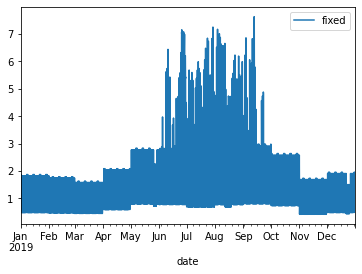

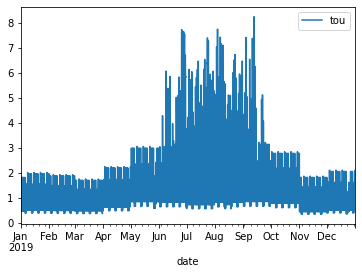

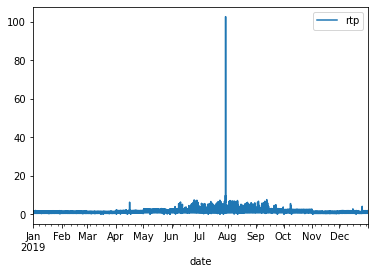

In [4]:
demand.plot(y='fixed', x='date')
demand.plot(y='tou', x='date')
demand.plot(y='rtp', x='date')

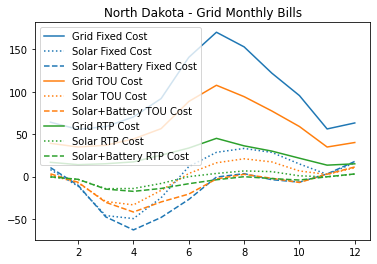

In [5]:
title = "%s - Grid Monthly Bills" % location.state
plt.plot(demand.groupby(['month']).sum()['fixed cost'], label='Grid Fixed Cost', color='tab:blue', linestyle='solid')
plt.plot(solar_demand.groupby(['month']).sum()['fixed cost'], label='Solar Fixed Cost', color='tab:blue', linestyle='dotted')
plt.plot(battery_demand.groupby(['month']).sum()['fixed cost'], label='Solar+Battery Fixed Cost', color='tab:blue', linestyle='dashed')

plt.plot(demand.groupby(['month']).sum()['tou cost'], label='Grid TOU Cost', color='tab:orange', linestyle='solid')
plt.plot(solar_demand.groupby(['month']).sum()['tou cost'], label='Solar TOU Cost', color='tab:orange', linestyle='dotted')
plt.plot(battery_demand.groupby(['month']).sum()['tou cost'], label='Solar+Battery TOU Cost', color='tab:orange', linestyle='dashed')

plt.plot(demand.groupby(['month']).sum()['rtp cost'], label='Grid RTP Cost', color='tab:green', linestyle='solid')
plt.plot(solar_demand.groupby(['month']).sum()['rtp cost'], label='Solar RTP Cost', color='tab:green', linestyle='dotted')
plt.plot(battery_demand.groupby(['month']).sum()['rtp cost'], label='Solar+Battery RTP Cost', color='tab:green', linestyle='dashed')

plt.title(title)
plt.legend()
plt.show()
plt.close()

<AxesSubplot:xlabel='date'>

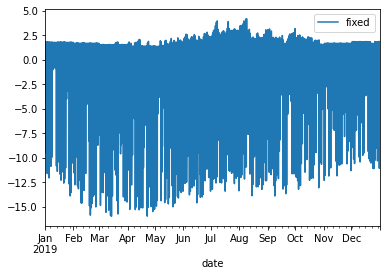

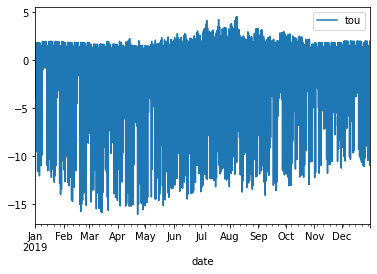

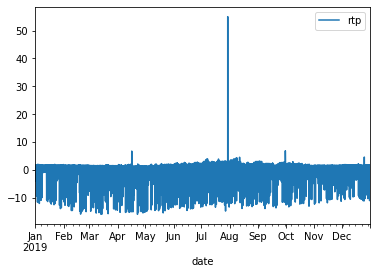

In [2]:
battery_demand.plot(y='fixed', x='date')
battery_demand.plot(y='tou', x='date')
battery_demand.plot(y='rtp', x='date')

<AxesSubplot:title={'center':'rtp'}, xlabel='hour'>

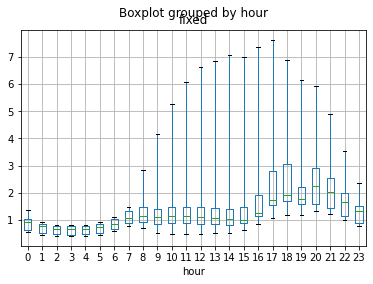

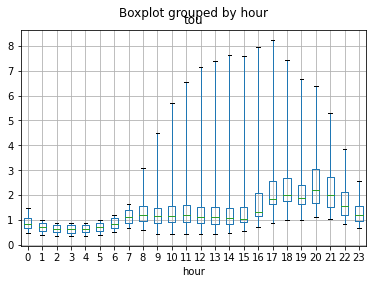

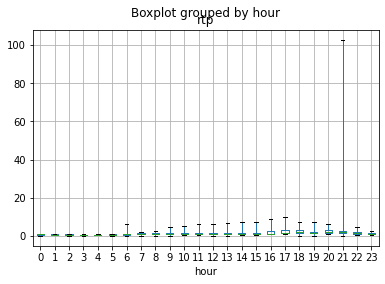

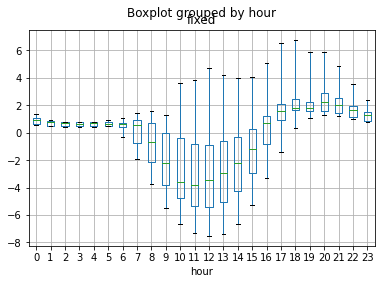

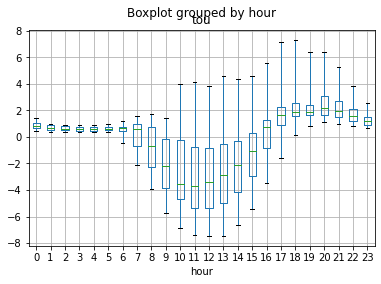

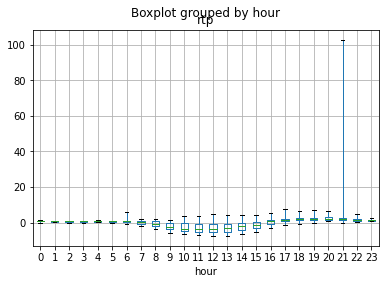

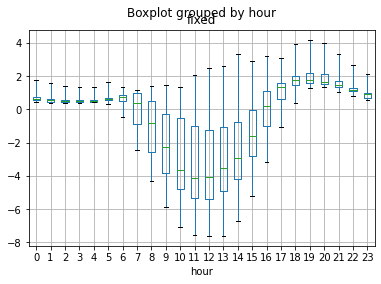

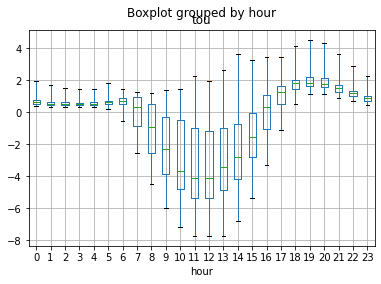

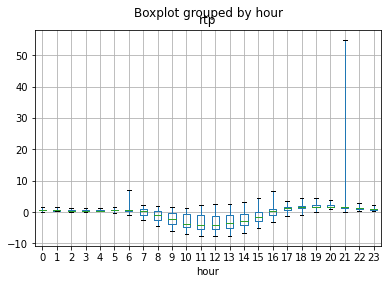

In [6]:
demand.boxplot(column='fixed', by='hour', whis=(0,100))
demand.boxplot(column='tou', by='hour', whis=(0,100))
demand.boxplot(column='rtp', by='hour', whis=(0,100))

solar_demand.boxplot(column='fixed', by='hour', whis=(0,100))
solar_demand.boxplot(column='tou', by='hour', whis=(0,100))
solar_demand.boxplot(column='rtp', by='hour', whis=(0,100))

battery_demand.boxplot(column='fixed', by='hour', whis=(0,100))
battery_demand.boxplot(column='tou', by='hour', whis=(0,100))
battery_demand.boxplot(column='rtp', by='hour', whis=(0,100))

In [15]:
print(demand.kurtosis()[['fixed', 'tou', 'rtp']].add_suffix(' kurtosis'))
print(solar_demand.kurtosis()[['fixed', 'tou', 'rtp']].add_suffix(' kurtosis'))
print(battery_demand.kurtosis()[['fixed', 'tou', 'rtp']].add_suffix(' kurtosis'))

fixed kurtosis       5.995205
tou kurtosis         6.508393
rtp kurtosis      1785.688714
dtype: float64
fixed kurtosis      0.887658
tou kurtosis        0.903713
rtp kurtosis      279.773220
dtype: float64
fixed kurtosis     0.838338
tou kurtosis       0.847981
rtp kurtosis      38.329890
dtype: float64


In [18]:
print(demand.skew()[['fixed', 'tou', 'rtp']].add_suffix(' skew'))
print(solar_demand.skew()[['fixed', 'tou', 'rtp']].add_suffix(' skew'))
print(battery_demand.skew()[['fixed', 'tou', 'rtp']].add_suffix(' skew'))

fixed skew     2.433225
tou skew       2.484526
rtp skew      29.368864
dtype: float64
fixed skew   -0.995540
tou skew     -0.965775
rtp skew      6.332619
dtype: float64
fixed skew   -1.301391
tou skew     -1.290362
rtp skew      0.414715
dtype: float64


In [20]:
print(demand.median(numeric_only=True)[['fixed', 'tou', 'rtp']].add_suffix(' median'))
print(solar_demand.median(numeric_only=True)[['fixed', 'tou', 'rtp']].add_suffix(' median'))
print(battery_demand.median(numeric_only=True)[['fixed', 'tou', 'rtp']].add_suffix(' median'))

fixed median    1.082223
tou median      1.115711
rtp median      1.084530
dtype: float64
fixed median    0.652672
tou median      0.653286
rtp median      0.648138
dtype: float64
fixed median    0.561849
tou median      0.558539
rtp median      0.553986
dtype: float64


In [21]:
print(demand.quantile(.9)[['fixed', 'tou', 'rtp']].add_suffix(' 90th'))
print(solar_demand.quantile(.9)[['fixed', 'tou', 'rtp']].add_suffix(' 90th'))
print(battery_demand.quantile(.9)[['fixed', 'tou', 'rtp']].add_suffix(' 90th'))

fixed 90th    2.760535
tou 90th      2.786339
rtp 90th      2.767431
Name: 0.9, dtype: float64
fixed 90th    2.082666
tou 90th      2.121998
rtp 90th      2.082200
Name: 0.9, dtype: float64
fixed 90th    1.685810
tou 90th      1.747931
rtp 90th      1.701277
Name: 0.9, dtype: float64


In [3]:
monthly_demand = demand.groupby(['month']).sum()[
        ['fixed cost', 'tou cost', 'rtp cost']
    ].rename(columns = {'fixed cost':'Grid Fixed Cost',
                        'tou cost':'Grid TOU Cost',
                        'rtp cost':'Grid RTP Cost'}, inplace = False)
monthly_demand.merge(solar_demand.groupby(['month']).sum()[
        ['fixed cost', 'tou cost', 'rtp cost']
    ].rename(columns = {'fixed cost':'Solar Fixed Cost',
                        'tou cost':'Solar TOU Cost',
                        'rtp cost':'Solar RTP Cost'}, inplace = False), on='month')
monthly_demand.merge(battery_demand.groupby(['month']).sum()[
        ['fixed cost', 'tou cost', 'rtp cost']
    ].rename(columns = {'fixed cost':'Solar+Battery Fixed Cost',
                        'tou cost':'Solar+Battery TOU Cost',
                        'rtp cost':'Solar+Battery RTP Cost'}, inplace = False), on='month')

,Grid Fixed Cost,Grid TOU Cost,Grid RTP Cost,Solar+Battery Fixed Cost,Solar+Battery TOU Cost,Solar+Battery RTP Cost
month,,,,,,
1,64.1625,39.210830,16.802965,-45.271055,-34.278580,-17.763159
2,55.7550,34.898931,14.024817,-77.378951,-49.018622,-20.675173
3,58.8525,36.917455,15.121200,-152.540093,-96.764464,-44.265653
4,70.3575,44.347265,17.312665,-182.949267,-119.628704,-48.881738
5,92.0400,56.531233,25.243915,-165.375879,-102.819923,-47.462357
6,140.7150,88.598139,33.634557,-155.978448,-105.648493,-42.170760
7,170.3625,107.763571,45.082539,-142.335517,-94.351058,-45.198300
8,153.1050,94.332610,36.243903,-116.466793,-70.715206,-29.802357
9,122.1300,77.453603,30.054967,-97.246900,-62.202085,-26.621718


In [2]:
monthly_demand = demand.groupby(['month']).sum()[['fixed cost', 'tou cost', 'rtp cost']].add_prefix('grid ')
monthly_demand = monthly_demand.merge(solar_demand.groupby(['month']).sum()[['fixed cost', 'tou cost', 'rtp cost']].add_prefix('solar '),
                     on='month')
monthly_demand = monthly_demand.merge(battery_demand.groupby(['month']).sum()[['fixed cost', 'tou cost', 'rtp cost']].add_prefix('solar+batt '),
                     on='month')

In [3]:
monthly_demand

,grid fixed cost,grid tou cost,grid rtp cost,solar fixed cost,solar tou cost,solar rtp cost,solar+batt fixed cost,solar+batt tou cost,solar+batt rtp cost
month,,,,,,,,,
1,64.1625,39.210830,16.802965,8.209350,1.710276,-0.676941,10.615292,3.177415,-0.303814
2,55.7550,34.898931,14.024817,-11.411301,-7.443543,-3.409622,-10.315513,-6.741674,-3.267246
3,58.8525,36.917455,15.121200,-46.106763,-29.446016,-14.327976,-47.632966,-30.431306,-14.830835
4,70.3575,44.347265,17.312665,-49.621844,-33.449199,-14.111155,-63.006582,-41.856077,-17.467709
5,92.0400,56.531233,25.243915,-25.061214,-16.337875,-8.157865,-48.317026,-29.977361,-14.072569
6,140.7150,88.598139,33.634557,11.739056,3.613551,-0.101709,-27.050923,-20.695661,-8.447346
7,170.3625,107.763571,45.082539,28.598351,16.241033,3.656414,-0.626160,-2.864086,-3.788402
8,153.1050,94.332610,36.243903,33.195812,20.963306,6.612974,3.403266,2.630177,-0.181085
9,122.1300,77.453603,30.054967,28.528707,17.274012,5.801920,-3.671483,-2.039252,-2.375377


In [24]:
base_90pct = demand.quantile(.9)['fixed']

In [33]:
print(demand[demand[['fixed', 'tou', 'rtp']] > base_90pct][['fixed','tou','rtp']].count())
print(solar_demand[solar_demand[['fixed', 'tou', 'rtp']] > base_90pct][['fixed','tou','rtp']].count())
print(battery_demand[battery_demand[['fixed', 'tou', 'rtp']] > base_90pct][['fixed','tou','rtp']].count())

fixed    876
tou      898
rtp      879
dtype: int64
fixed    482
tou      520
rtp      484
dtype: int64
fixed    122
tou      150
rtp      125
dtype: int64


In [79]:
print(demand.query('fixed > 0')['fixed'].sum())
print(demand.query('tou > 0')['tou'].sum())
print(demand.query('rtp > 0')['rtp'].sum())

print(demand.query('fixed < 0')['fixed'].sum())
print(demand.query('tou < 0')['tou'].sum())
print(demand.query('rtp < 0')['rtp'].sum())

print(solar_demand.query('fixed > 0')['fixed'].sum())
print(solar_demand.query('tou > 0')['tou'].sum())
print(solar_demand.query('rtp > 0')['rtp'].sum())

print(solar_demand.query('fixed < 0')['fixed'].sum())
print(solar_demand.query('tou < 0')['tou'].sum())
print(solar_demand.query('rtp < 0')['rtp'].sum())

print(battery_demand.query('fixed > 0')['fixed'].sum())
print(battery_demand.query('tou > 0')['tou'].sum())
print(battery_demand.query('rtp > 0')['rtp'].sum())

print(battery_demand.query('fixed < 0')['fixed'].sum())
print(battery_demand.query('tou < 0')['tou'].sum())
print(battery_demand.query('rtp < 0')['rtp'].sum())

12910.000000000002
13050.49358154391
12944.363058211999
0.0
0.0
0.0
7740.437340089515
7850.509717604429
7804.3487428405115
-7606.802261113183
-7576.381057084189
-7636.350605652186
6197.843269820777
6267.5619115599475
6228.280297547688
-8144.872817844447
-8107.763482740617
-8170.803513888192


In [ ]:

pd.DataFrame(demand[demand[['fixed', 'tou', 'rtp']] > 0][['fixed','tou','rtp']].add_prefix("Grid "))
print(solar_demand[solar_demand[['fixed', 'tou', 'rtp']] > 0][['fixed','tou','rtp']].count())
print(battery_demand[battery_demand[['fixed', 'tou', 'rtp']] > 0][['fixed','tou','rtp']].count())

In [111]:
demand['day'] = demand.date.dt.day

/usr/local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


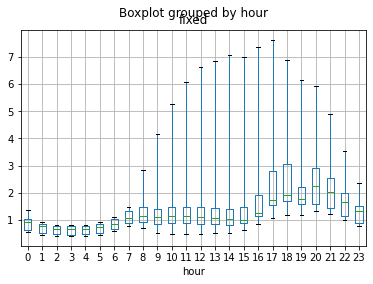

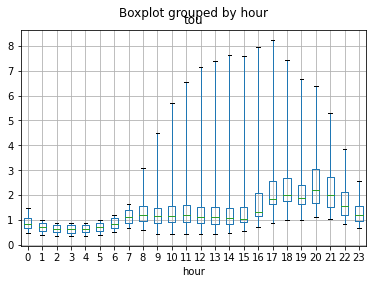

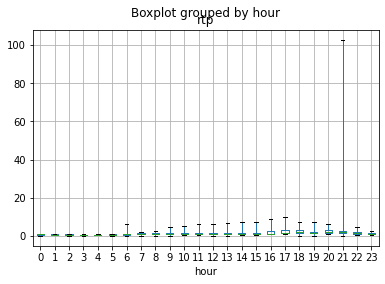

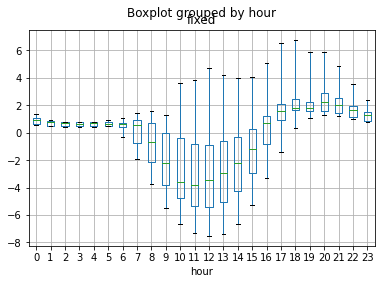

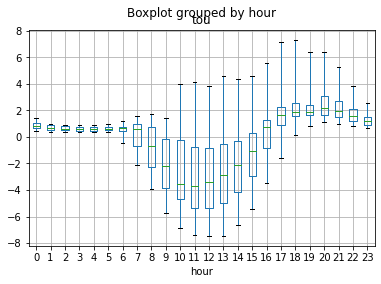

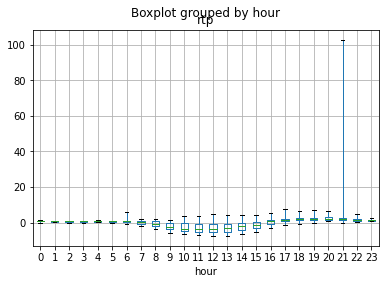

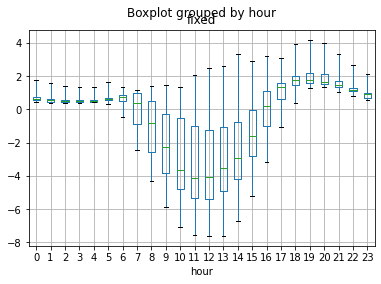

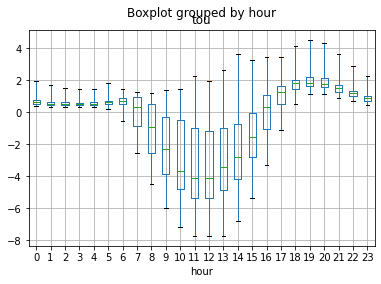

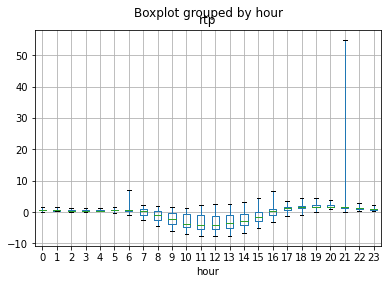

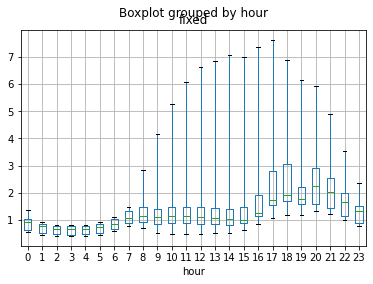

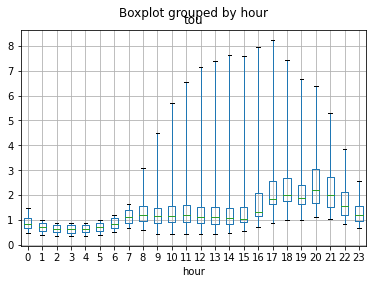

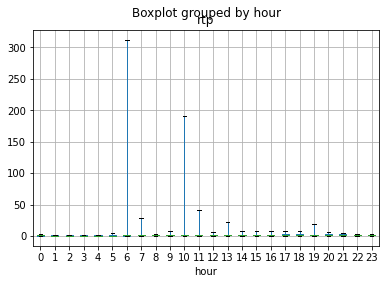

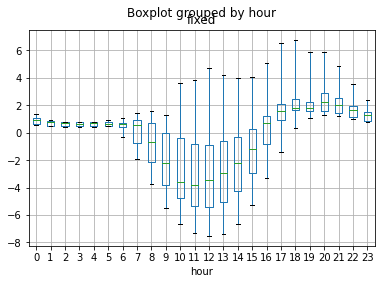

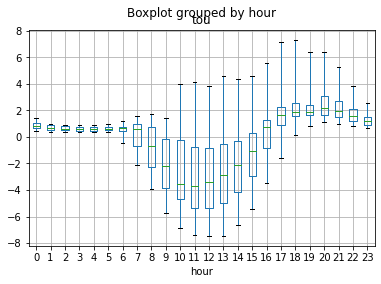

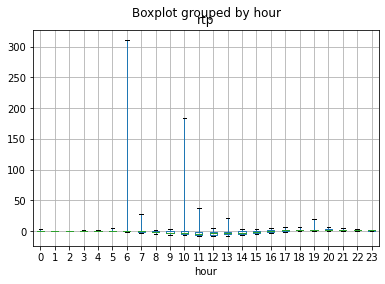

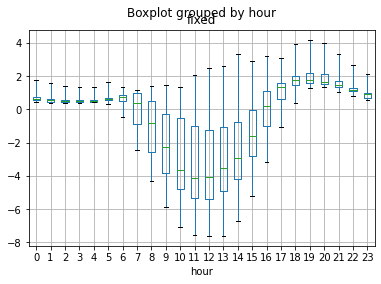

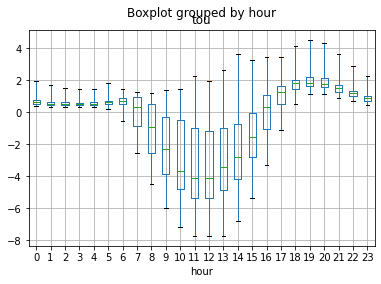

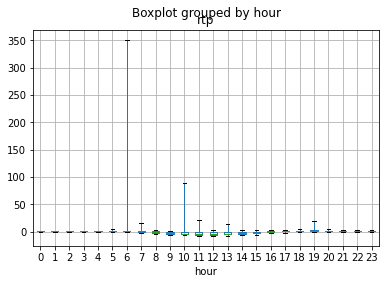

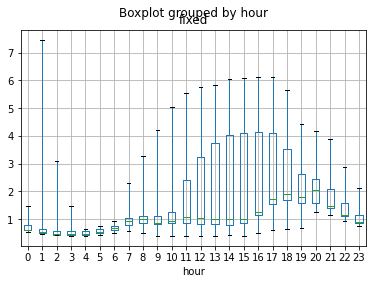

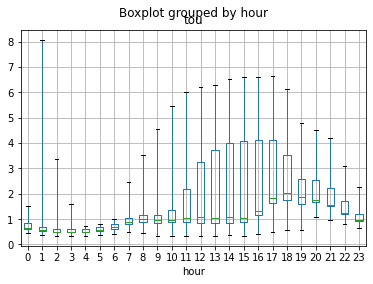

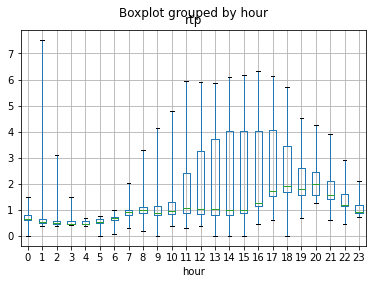

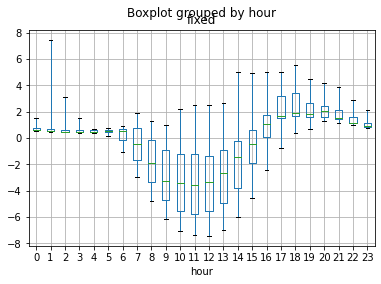

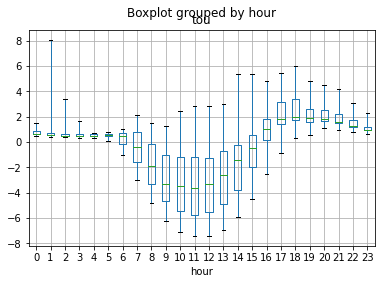

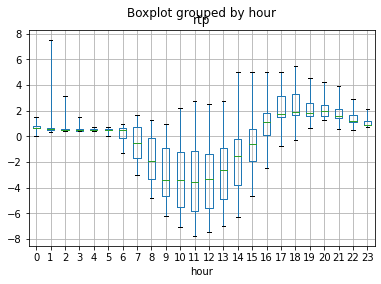

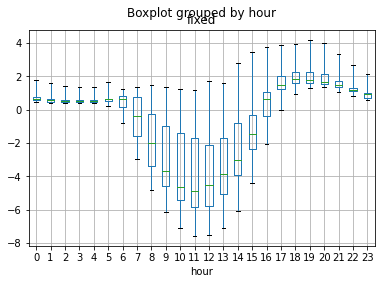

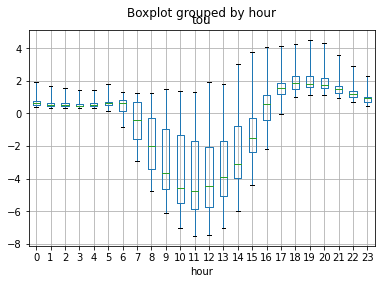

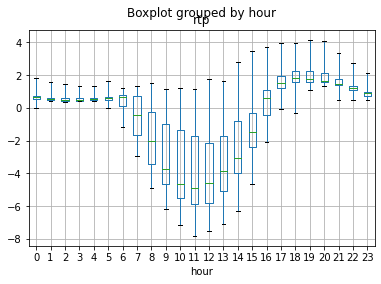

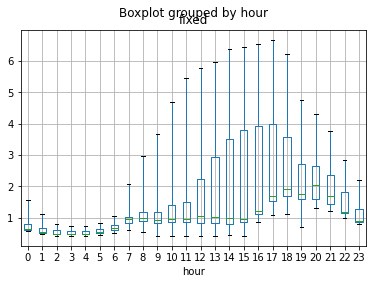

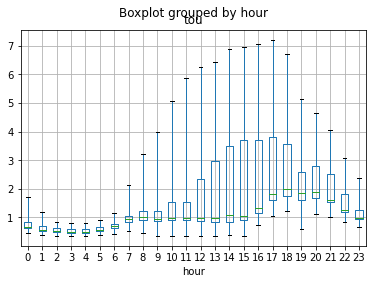

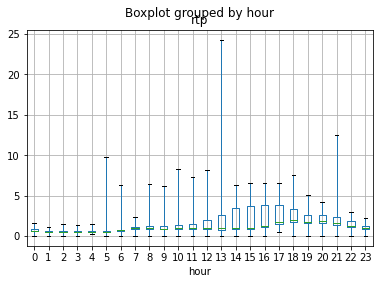

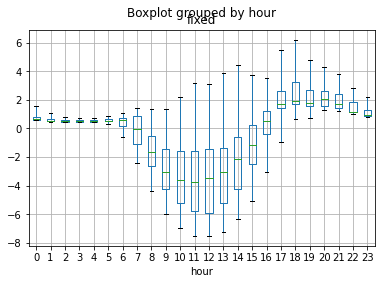

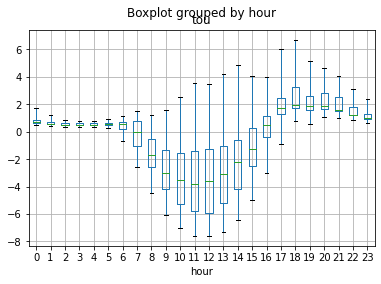

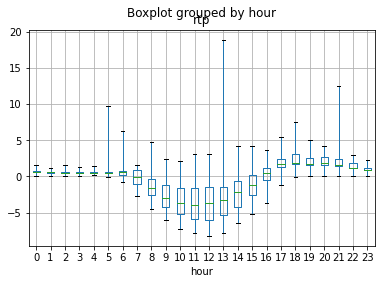

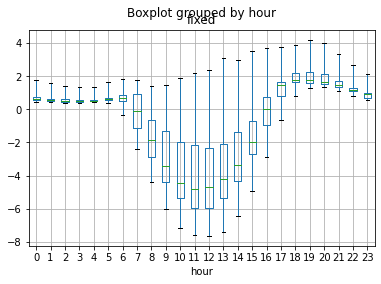

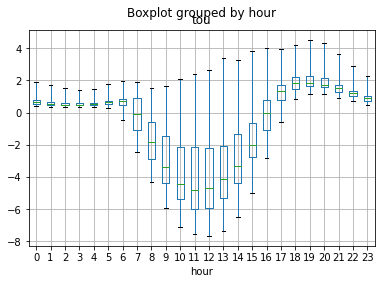

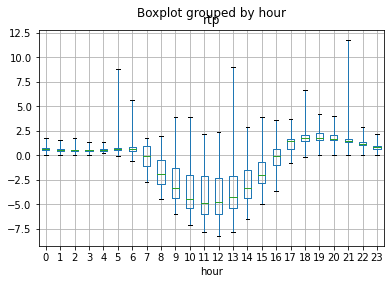

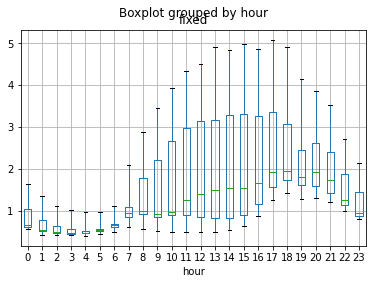

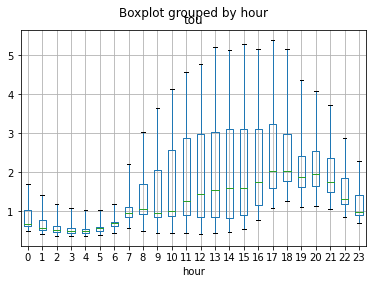

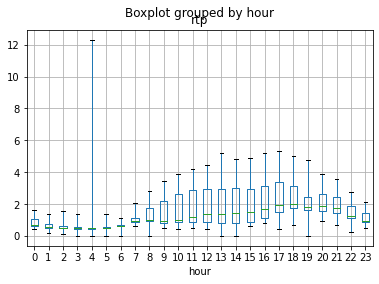

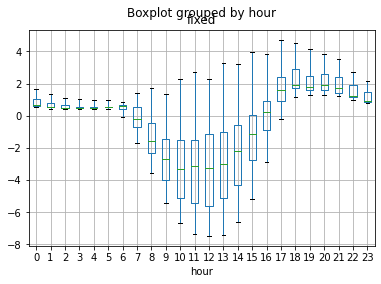

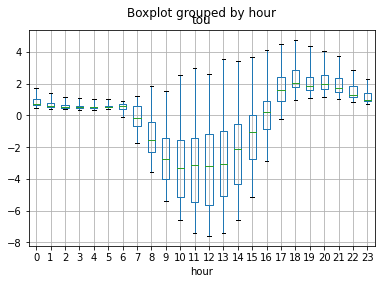

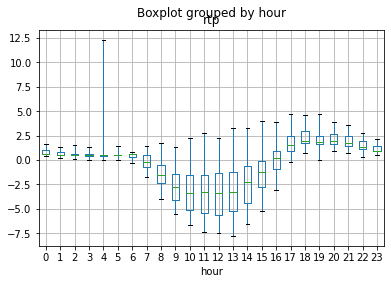

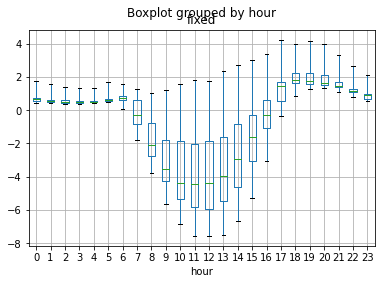

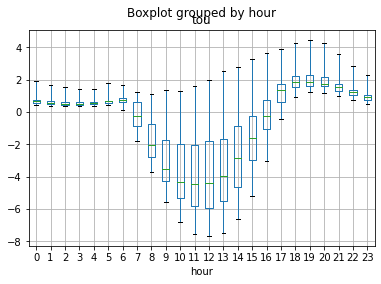

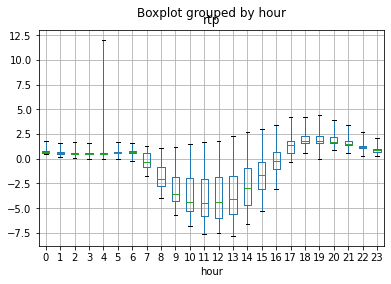

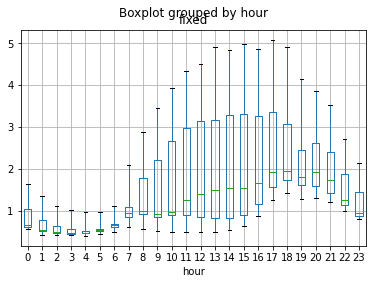

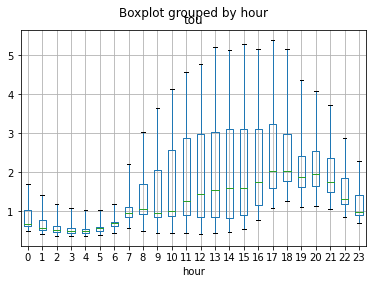

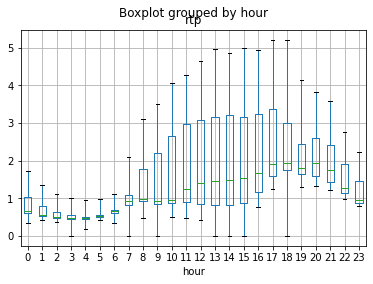

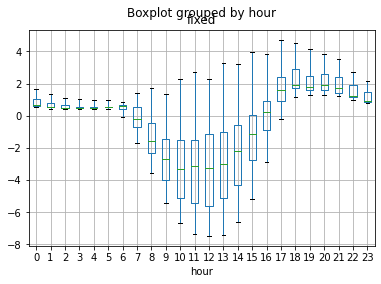

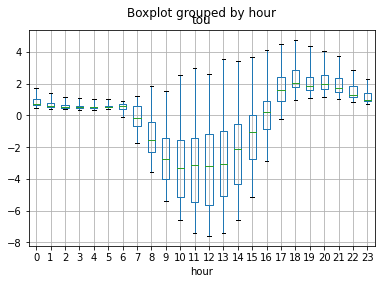

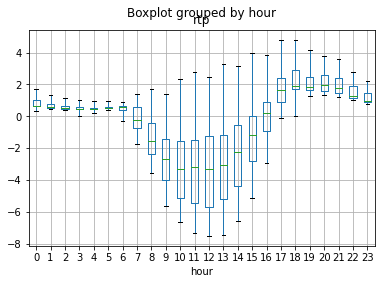

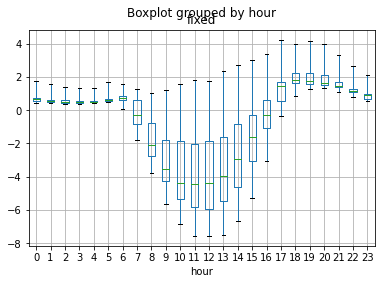

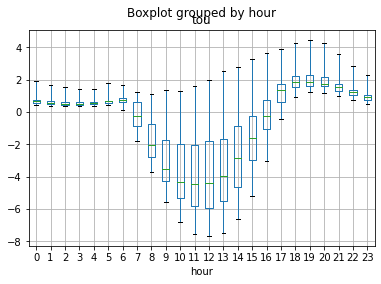

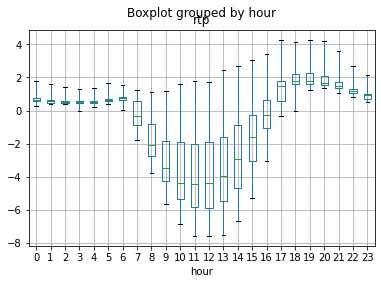

In [7]:
for location in locations:
    bsa = BaseSystemAnalysis(location)
    ssa = SolarSystemAnalysis(location)
    sbsa = SolarBatterySystemAnalysis(location)
    demand = bsa.demand()
    solar_demand = ssa.demand()
    battery_demand = sbsa.demand()
    demand.boxplot(column='fixed', by='hour', whis=(0,100))
    demand.boxplot(column='tou', by='hour', whis=(0,100))
    demand.boxplot(column='rtp', by='hour', whis=(0,100))

    solar_demand.boxplot(column='fixed', by='hour', whis=(0,100))
    solar_demand.boxplot(column='tou', by='hour', whis=(0,100))
    solar_demand.boxplot(column='rtp', by='hour', whis=(0,100))

    battery_demand.boxplot(column='fixed', by='hour', whis=(0,100))
    battery_demand.boxplot(column='tou', by='hour', whis=(0,100))
    battery_demand.boxplot(column='rtp', by='hour', whis=(0,100))

In [150]:
for location in locations:
    bsa = BaseSystemAnalysis(location)
    ssa = SolarSystemAnalysis(location)
    sbsa = SolarBatterySystemAnalysis(location)
    demand = bsa.demand()
    solar_demand = ssa.demand()
    battery_demand = sbsa.demand()

    monthly_demand = demand.groupby(['month']).sum()[['fixed cost', 'tou cost', 'rtp cost']].add_prefix('grid ')
    monthly_demand = monthly_demand.merge(solar_demand.groupby(['month']).sum()[['fixed cost', 'tou cost', 'rtp cost']].add_prefix('solar '), on='month')
    monthly_demand = monthly_demand.merge(battery_demand.groupby(['month']).sum()[['fixed cost', 'tou cost', 'rtp cost']].add_prefix('solar+batt '), on='month')
    fname = "%s %s %s.csv" % (location.city, location.state, location.iso)
    monthly_demand.to_csv(fname)

In [10]:
for location in locations:
    bsa = BaseSystemAnalysis(location)
    ssa = SolarSystemAnalysis(location)
    sbsa = SolarBatterySystemAnalysis(location)
    demand = bsa.demand()
    solar_demand = ssa.demand()
    battery_demand = sbsa.demand()

    prev_ind = demand.index
    demand.index = demand.date
    months = demand.index.month_name()
    hr = demand.index.hour
    load_by_month = demand.groupby([months, hr])["fixed"].max().rename_axis(["", "hr"]).unstack(level=0)
    s = load_by_month.reindex(columns=months.unique()).style.background_gradient(cmap='Blues')
    fname = "output/load/fixed grid peak load %s %s %s.png" % (location.city, location.state, location.iso)
    imgkit.from_string(s.render(), fname)

    load_by_month = demand.groupby([months, hr])["tou"].max().rename_axis(["", "hr"]).unstack(level=0)
    s = load_by_month.reindex(columns=months.unique()).style.background_gradient(cmap='Blues')
    fname = "output/load/tou grid peak load %s %s %s.png" % (location.city, location.state, location.iso)
    imgkit.from_string(s.render(), fname)
    
    load_by_month = demand.groupby([months, hr])["rtp"].max().rename_axis(["", "hr"]).unstack(level=0)
    s = load_by_month.reindex(columns=months.unique()).style.background_gradient(cmap='Blues')
    fname = "output/load/rtp grid peak load %s %s %s.png" % (location.city, location.state, location.iso)
    imgkit.from_string(s.render(), fname)


    prev_ind = solar_demand.index
    solar_demand.index = solar_demand.date
    months = solar_demand.index.month_name()
    hr = solar_demand.index.hour
    load_by_month = solar_demand.groupby([months, hr])["fixed"].max().rename_axis(["", "hr"]).unstack(level=0)
    s = load_by_month.reindex(columns=months.unique()).style.background_gradient(cmap='Blues')
    fname = "output/load/fixed solar peak load %s %s %s.png" % (location.city, location.state, location.iso)
    imgkit.from_string(s.render(), fname)

    load_by_month = solar_demand.groupby([months, hr])["tou"].max().rename_axis(["", "hr"]).unstack(level=0)
    s = load_by_month.reindex(columns=months.unique()).style.background_gradient(cmap='Blues')
    fname = "output/load/tou solar peak load %s %s %s.png" % (location.city, location.state, location.iso)
    imgkit.from_string(s.render(), fname)
    
    load_by_month = solar_demand.groupby([months, hr])["rtp"].max().rename_axis(["", "hr"]).unstack(level=0)
    s = load_by_month.reindex(columns=months.unique()).style.background_gradient(cmap='Blues')
    fname = "output/load/rtp solar peak load %s %s %s.png" % (location.city, location.state, location.iso)
    imgkit.from_string(s.render(), fname)

    
    prev_ind = battery_demand.index
    battery_demand.index = battery_demand.date
    months = battery_demand.index.month_name()
    hr = battery_demand.index.hour
    load_by_month = battery_demand.groupby([months, hr])["fixed"].max().rename_axis(["", "hr"]).unstack(level=0)
    s = load_by_month.reindex(columns=months.unique()).style.background_gradient(cmap='Blues')
    fname = "output/load/fixed battery peak load %s %s %s.png" % (location.city, location.state, location.iso)
    imgkit.from_string(s.render(), fname)

    load_by_month = battery_demand.groupby([months, hr])["tou"].max().rename_axis(["", "hr"]).unstack(level=0)
    s = load_by_month.reindex(columns=months.unique()).style.background_gradient(cmap='Blues')
    fname = "output/load/tou battery peak load %s %s %s.png" % (location.city, location.state, location.iso)
    imgkit.from_string(s.render(), fname)
    
    load_by_month = battery_demand.groupby([months, hr])["rtp"].max().rename_axis(["", "hr"]).unstack(level=0)
    s = load_by_month.reindex(columns=months.unique()).style.background_gradient(cmap='Blues')
    fname = "output/load/rtp battery peak load %s %s %s.png" % (location.city, location.state, location.iso)
    imgkit.from_string(s.render(), fname)

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                    

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


In [32]:
load_by_month = demand.groupby([hr,months])["fixed"].max().rename_axis(["", "hr"]).unstack(level=0)
load_by_month.reindex(columns=hr.unique()).style.background_gradient(cmap='Blues')

date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
hr,,,,,,,,,,,,,,,,,,,,,,,,
April,0.790447,0.665315,0.597602,0.589241,0.594910,0.663147,0.798774,1.060313,1.159411,1.102785,1.143221,1.146986,1.100442,1.064060,1.041091,1.013792,1.217424,1.578893,1.669813,1.557102,2.082666,1.875415,1.471811,1.130992
August,1.057766,0.884092,0.787575,0.776562,0.787382,0.877612,1.035256,1.377979,1.537225,1.492375,3.305102,4.971013,5.662571,5.910527,6.445769,6.678267,6.871229,7.171740,6.727940,5.806584,5.189338,4.158213,2.879422,1.889425
December,0.638175,0.540693,0.489388,0.482537,0.485273,0.540981,0.706908,0.968834,1.029709,0.924762,0.945117,0.947515,0.912006,0.887056,0.878262,0.961478,1.249581,1.730115,1.952916,1.837954,1.637120,1.479829,1.167169,0.903167
February,0.617619,0.523277,0.473624,0.466995,0.469642,0.523556,0.666049,0.899850,0.960437,0.876442,0.899574,0.902033,0.867641,0.843170,0.832703,0.905317,1.163631,1.596759,1.788334,1.682330,1.584388,1.432164,1.129574,0.874076
January,0.632733,0.536083,0.485215,0.478423,0.481134,0.536368,0.702203,0.963336,1.023569,0.918232,0.938162,0.940529,0.905326,0.880612,0.872036,0.936688,1.208827,1.664236,1.869298,1.758778,1.623160,1.467210,1.157216,0.895465
July,1.358760,0.780508,0.695299,0.685577,0.695129,0.774787,0.895900,1.178809,2.204926,3.801109,4.713522,5.616870,6.037690,6.129389,6.604571,6.896815,7.079163,7.252625,6.843789,5.827681,5.570250,4.532079,3.266391,2.263933
June,1.065532,0.890584,0.793358,0.782264,0.793163,0.884056,1.019673,1.339676,2.847941,4.150447,5.255742,6.071239,6.630466,6.851192,7.061014,7.010674,6.935469,7.152816,6.872624,6.160993,5.914829,4.888367,3.553259,2.371967
March,0.606761,0.510708,0.458730,0.452312,0.456664,0.509043,0.611789,0.811064,0.887260,0.845119,0.876418,0.879318,0.843588,0.815636,0.797857,0.863768,1.089738,1.475651,1.627124,1.522754,1.598692,1.439602,1.129789,0.868170
May,1.074649,0.904527,0.812468,0.801101,0.808808,0.901579,1.047282,1.360744,1.499053,1.459648,1.521966,1.527380,1.464043,1.413885,1.378473,1.310944,1.532961,1.939032,1.998345,1.859161,2.831481,2.549714,2.000996,1.537636


In [8]:
demand.head()

,fixed,fixed rate,date,tou,tou rate,rtp,rtp rate,fixed cost,tou cost,rtp cost,hour,month
date,,,,,,,,,,,,
2019-01-01 00:00:00,0.632733,0.086,2019-01-01 00:00:00,0.632733,0.043,0.632733,0.01914,0.054415,0.027208,0.012111,0,1
2019-01-01 01:00:00,0.536083,0.086,2019-01-01 01:00:00,0.536083,0.043,0.544335,0.01682,0.046103,0.023052,0.009156,1,1
2019-01-01 02:00:00,0.485215,0.086,2019-01-01 02:00:00,0.485215,0.043,0.490454,0.01539,0.041728,0.020864,0.007548,2,1
2019-01-01 03:00:00,0.478423,0.086,2019-01-01 03:00:00,0.478423,0.043,0.480278,0.01492,0.041144,0.020572,0.007166,3,1
2019-01-01 04:00:00,0.481134,0.086,2019-01-01 04:00:00,0.481134,0.043,0.481380,0.01486,0.041378,0.020689,0.007153,4,1


In [13]:
"""    prev_ind = demand.index
    demand.index = demand.date
    months = demand.index.month_name()
    hr = demand.index.hour
    load_by_month = demand.groupby([months, hr])["fixed"].max().rename_axis(["", "hr"]).unstack(level=0)
    s = load_by_month.reindex(columns=months.unique()).style.background_gradient(cmap='Blues')
    fname = "output/load/fixed grid peak load %s %s %s.png" % (location.city, location.state, location.iso)
    imgkit.from_string(s.render(), fname)

    load_by_month = demand.groupby([months, hr])["tou"].max().rename_axis(["", "hr"]).unstack(level=0)
    s = load_by_month.reindex(columns=months.unique()).style.background_gradient(cmap='Blues')
    fname = "output/load/tou grid peak load %s %s %s.png" % (location.city, location.state, location.iso)
    imgkit.from_string(s.render(), fname)
    
    load_by_month = demand.groupby([months, hr])["rtp"].max().rename_axis(["", "hr"]).unstack(level=0)
    s = load_by_month.reindex(columns=months.unique()).style.background_gradient(cmap='Blues')
    fname = "output/load/rtp grid peak load %s %s %s.png" % (location.city, location.state, location.iso)
    imgkit.from_string(s.render(), fname)
"""
pd.crosstab(demand.fixed,demand.tou)#, normalize='index')

tou,0.366628,0.369425,0.371768,0.373743,0.374128,0.377751,0.379046,0.383646,0.384966,0.386380,...,5.143488,5.159053,5.161061,5.173622,5.175277,5.185014,5.228759,5.302758,5.322026,5.406157
fixed,,,,,,,,,,,,,,,,,,,,,
0.400821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.413400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.419116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.419963,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.423168,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.916558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4.986138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5.004256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
for location in locations:
    bsa = BaseSystemAnalysis(location)
    ssa = SolarSystemAnalysis(location)
    sbsa = SolarBatterySystemAnalysis(location)
    demand = bsa.demand()
    solar_demand = ssa.demand()
    battery_demand = sbsa.demand()

    demand.index = demand.date
    months = demand.index.month_name()
    hr = demand.index.hour
    load_by_month = demand.groupby([months, hr])["fixed"].max().rename_axis(["", "hr"]).unstack(level=0)
    fname = "output/load/%s %s %s grid fixed peak load.csv" % (location.city, location.state, location.iso)
    with open(fname, 'w') as fh:
        fh.write(load_by_month.transpose().to_csv())

    load_by_month = demand.groupby([months, hr])["tou"].max().rename_axis(["", "hr"]).unstack(level=0)
    fname = "output/load/%s %s %s grid tou peak load.csv" % (location.city, location.state, location.iso)
    with open(fname, 'w') as fh:
        fh.write(load_by_month.transpose().to_csv())

    load_by_month = demand.groupby([months, hr])["rtp"].max().rename_axis(["", "hr"]).unstack(level=0)
    fname = "output/load/%s %s %s grid rtp peak load.csv" % (location.city, location.state, location.iso)
    with open(fname, 'w') as fh:
        fh.write(load_by_month.transpose().to_csv())

    prev_ind = solar_demand.index
    solar_demand.index = solar_demand.date
    months = solar_demand.index.month_name()
    hr = solar_demand.index.hour
    load_by_month = solar_demand.groupby([months, hr])["fixed"].max().rename_axis(["", "hr"]).unstack(level=0)
    fname = "output/load/%s %s %s solar fixed peak load.csv" % (location.city, location.state, location.iso)
    with open(fname, 'w') as fh:
        fh.write(load_by_month.transpose().to_csv())

    load_by_month = solar_demand.groupby([months, hr])["tou"].max().rename_axis(["", "hr"]).unstack(level=0)
    fname = "output/load/%s %s %s solar tou peak load.csv" % (location.city, location.state, location.iso)
    with open(fname, 'w') as fh:
        fh.write(load_by_month.transpose().to_csv())

    load_by_month = solar_demand.groupby([months, hr])["rtp"].max().rename_axis(["", "hr"]).unstack(level=0)
    fname = "output/load/%s %s %s solar rtp peak load.csv" % (location.city, location.state, location.iso)
    with open(fname, 'w') as fh:
        fh.write(load_by_month.transpose().to_csv())

    prev_ind = battery_demand.index
    battery_demand.index = battery_demand.date
    months = battery_demand.index.month_name()
    hr = battery_demand.index.hour
    load_by_month = battery_demand.groupby([months, hr])["fixed"].max().rename_axis(["", "hr"]).unstack(level=0)
    fname = "output/load/%s %s %s battery fixed peak load.csv" % (location.city, location.state, location.iso)
    with open(fname, 'w') as fh:
        fh.write(load_by_month.transpose().to_csv())

    load_by_month = battery_demand.groupby([months, hr])["tou"].max().rename_axis(["", "hr"]).unstack(level=0)
    fname = "output/load/%s %s %s battery tou peak load.csv" % (location.city, location.state, location.iso)
    with open(fname, 'w') as fh:
        fh.write(load_by_month.transpose().to_csv())

    load_by_month = battery_demand.groupby([months, hr])["rtp"].max().rename_axis(["", "hr"]).unstack(level=0)
    fname = "output/load/%s %s %s battery rtp peak load.csv" % (location.city, location.state, location.iso)
    with open(fname, 'w') as fh:
        fh.write(load_by_month.transpose().to_csv())

In [31]:
for location in locations:
    bsa = BaseSystemAnalysis(location)
    ssa = SolarSystemAnalysis(location)
    sbsa = SolarBatterySystemAnalysis(location)
    demand = bsa.demand()
    solar_demand = ssa.demand()
    battery_demand = sbsa.demand()

    data = pd.DataFrame({'grid fixed': demand.groupby(['month']).sum()['fixed cost'],
                         'grid tou': demand.groupby(['month']).sum()['tou cost'],
                         'grid rtp': demand.groupby(['month']).sum()['rtp cost'],
                         'solar fixed': solar_demand.groupby(['month']).sum()['fixed cost'],
                         'solar tou': solar_demand.groupby(['month']).sum()['tou cost'],
                         'solar rtp': solar_demand.groupby(['month']).sum()['rtp cost'],
                         'battery fixed': battery_demand.groupby(['month']).sum()['fixed cost'],
                         'battery tou': battery_demand.groupby(['month']).sum()['tou cost'],
                         'battery rtp': battery_demand.groupby(['month']).sum()['rtp cost']})
    fname = "output/bills/%s, %s %s monthly bill.csv" % (location.city, location.state, location.iso)
    with open(fname, 'w') as fh:
        fh.write(data.to_csv())

In [30]:
data['grid fixed'].sum()

1110.2599999999998

<AxesSubplot:>

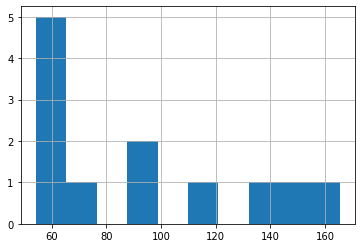

In [32]:
demand.groupby(['month']).sum()['fixed cost'].hist()

In [34]:
from distfits import dist_goodness_fit

In [35]:
dist_goodness_fit(demand.groupby(['month']).sum()['fixed cost'])

AttributeError: module 'scipy' has no attribute 'stats'

In [55]:
from scipy import stats
for location in locations:
    print("%s, %s %s" % (location.city, location.state, location.iso))
    bsa = BaseSystemAnalysis(location)
    ssa = SolarSystemAnalysis(location)
    sbsa = SolarBatterySystemAnalysis(location)
    demand = bsa.demand()
    solar_demand = ssa.demand()
    battery_demand = sbsa.demand()
    print("#"*20, "technology", "#"*20)
    print("fixed: ", stats.kruskal(demand.fixed, solar_demand.fixed, battery_demand.fixed))
    print("tou: ", stats.kruskal(demand.tou, solar_demand.tou, battery_demand.tou))
    print("rtp: ", stats.kruskal(demand.rtp, solar_demand.rtp, battery_demand.rtp))
    print("#"*20, "technology", "#"*20)
    print("#"*20, "pricing", "#"*20)
    print("base: ", stats.kruskal(demand.fixed, demand.tou, demand.rtp))
    print("solar: ", stats.kruskal(solar_demand.fixed, solar_demand.tou, solar_demand.rtp))
    print("battery: ", stats.kruskal(battery_demand.fixed, battery_demand.tou, battery_demand.rtp))
    print("#"*20, "pricing", "#"*20)
    print("grid fixed median", demand.fixed.median(), "grid tou median", demand.tou.median(),"grid rtp median",  demand.rtp.median())
    print("solar fixed median", solar_demand.fixed.median(), "solar tou median", solar_demand.tou.median(), "solar rtp median", solar_demand.rtp.median())
    print("battery fixed median", battery_demand.fixed.median(), "battery tou median",battery_demand.tou.median(), "battery rtp median",battery_demand.rtp.median())

Fargo, North Dakota MISO
#################### technology ####################
fixed:  KruskalResult(statistic=3616.463390106667, pvalue=0.0)
tou:  KruskalResult(statistic=3587.3429731971496, pvalue=0.0)
rtp:  KruskalResult(statistic=3595.622490359631, pvalue=0.0)
#################### technology ####################
#################### pricing ####################
base:  KruskalResult(statistic=6.216427071924658, pvalue=0.044680704556379354)
solar:  KruskalResult(statistic=1.2594405060146008, pvalue=0.5327408128033946)
battery:  KruskalResult(statistic=1.1032095316926198, pvalue=0.5760246835342742)
#################### pricing ####################
grid fixed median 1.0822225736056692 grid tou median 1.1157105357352846 grid rtp median 1.0845301736537838
solar fixed median 0.6526724018570496 solar fixed median 0.6532855402176008 solar fixed median 0.6481375720837055
battery fixed median 0.5618487017650154 battery tou median 0.55853913375 battery rtp median 0.5539856211040316
Fargo, North

<AxesSubplot:>

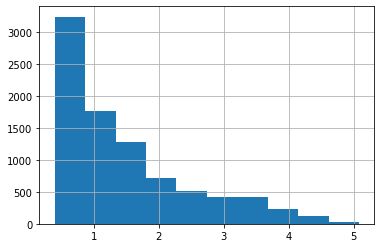

In [47]:
demand.fixed.hist()

<AxesSubplot:>

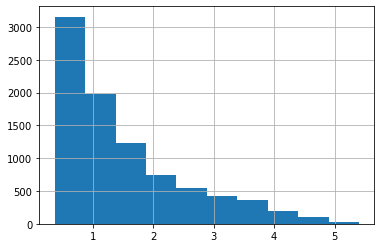

In [48]:
demand.tou.hist()

<AxesSubplot:>

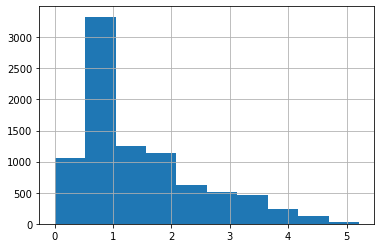

In [49]:
demand.rtp.hist()

In [50]:
demand.rtp.median()

1.0394969969643526